<a href="https://colab.research.google.com/github/northstarvn/EasyOCR/blob/master/clusters1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

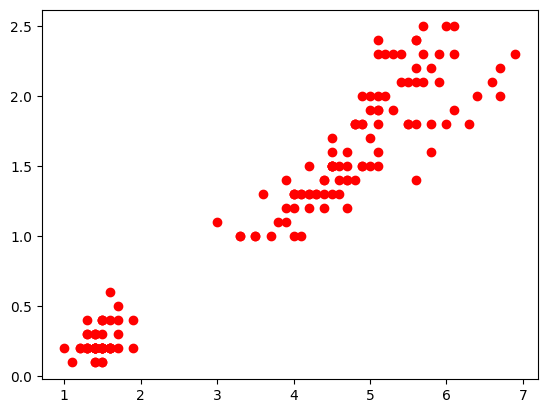

In [14]:
# prompt: demo how iris data is processed to find fuzzy clusters then display it
!pip install scikit-fuzzy
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Load the Iris dataset
iris = datasets.load_iris()

# Get the sepal and petal lengths and widths
sepal_length = iris.data[:, 0]
sepal_width = iris.data[:, 1]
petal_length = iris.data[:, 2]
petal_width = iris.data[:, 3]

# Create the fuzzy membership functions for each input variable
sepal_length_fuzz = fuzz.trapmf(sepal_length, [0, 0, 4, 6])
sepal_width_fuzz = fuzz.trapmf(sepal_width, [0, 0, 2.5, 4])
petal_length_fuzz = fuzz.trapmf(petal_length, [0, 0, 1, 5])
petal_width_fuzz = fuzz.trapmf(petal_width, [0, 0, 0.5, 2])

# Reshape the input data for cmeans clustering
data = np.vstack((sepal_length, sepal_width, petal_length, petal_width))

# Apply cmeans clustering
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data=data,
    c=3, # Number of clusters
    m=2,
    error=0.005,
    maxiter=1000,
    init=None
)

# Predict cluster membership for each data point
cluster_membership = np.argmax(u, axis=0)

# Display the fuzzy clusters
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(sepal_length, sepal_length_fuzz)
axs[0, 0].set_title('Sepal Length')
axs[0, 1].plot(sepal_width, sepal_width_fuzz)
axs[0, 1].set_title('Sepal Width')
axs[1, 0].plot(petal_length, petal_length_fuzz)
axs[1, 0].set_title('Petal Length')
axs[1, 1].plot(petal_width, petal_width_fuzz)
axs[1, 1].set_title('Petal Width')
plt.tight_layout()
plt.show()

# Display the fuzzy clusters for each data point
for i in range(len(iris.data)):
  print(f"Data point {i + 1}: Cluster {cluster_membership[i]}")